<a href="https://colab.research.google.com/github/HongjinZhu/Animal-Rescue-Ranger-Response-Prediction/blob/main/animal_class_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages and load the dataset

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d mexwell/urban-park-ranger-animal-condition-response

Dataset URL: https://www.kaggle.com/datasets/mexwell/urban-park-ranger-animal-condition-response
License(s): other
100% 200k/200k [00:00<00:00, 686kB/s]
100% 200k/200k [00:00<00:00, 685kB/s]


In [ ]:
# from google.colab import files
# files.upload()

import zipfile
import os

with zipfile.ZipFile('urban-park-ranger-animal-condition-response.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

os.listdir('.')

['.config',
 'kaggle.json',
 'Urban_Park_Ranger_Animal_Condition_Response_20240702.csv',
 'urban-park-ranger-animal-condition-response.zip',
 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('Urban_Park_Ranger_Animal_Condition_Response_20240702.csv')
df

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,311-06712416,ACC,6.0,False,False,NaN,NaN,False,False,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,...,311-06714879,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,...,311-06699415,ACC,1.0,False,False,NaN,NaN,False,False,119833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,06/29/2023 03:00:00 PM,06/29/2023 03:00:00 PM,Queens,Rockaway Beach and Boardwalk,Beach 25th Street,NaN,Employee,Native,Injured,1.25,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
5062,06/29/2023 04:30:00 PM,06/29/2023 04:45:00 AM,Queens,Little Bay Park,Next to Hockey Rink,Raccoon,Observed by Ranger,Native,Unhealthy,2.50,...,311- 14991552,ACC,1.0,False,False,NaN,NaN,False,False,247787
5063,06/30/2023 10:00:00 AM,06/30/2023 10:15:00 AM,Bronx,Franz Sigel Park,On bench just outside east side of dog run,Cat,Employee,Domestic,Healthy,0.25,...,NaN,ACC,1.0,False,False,NaN,NaN,False,False,175868
5064,06/30/2023 04:00:00 PM,06/30/2023 04:00:00 PM,Bronx,Pelham Bay Park,St. Mary's Park,Raccoon,Employee,Native,Injured,3.00,...,311-15008379,ACC,1.0,False,False,NaN,NaN,False,False,247914


# Descriptive Analysis

## Animal Class Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

           Species Description Animal Condition Species Status  \
0    Alligator Snapping Turtle          Healthy         Exotic   
1           American Alligator              DOA         Exotic   
2           American Alligator          Healthy         Exotic   
3           American Alligator        Unhealthy         Exotic   
4             American Bittern          Healthy         Native   
..                         ...              ...            ...   
629                    raccoon              DOA         Native   
630                    raccoon          Healthy         Native   
631                    raccoon          Injured         Native   
632                    raccoon        Unhealthy         Native   
633    white-breasted nuthatch        Unhealthy         Native   

                         Animal Class  count   sum  
0    Terrestrial Reptile or Amphibian      1   1.0  
1    Terrestrial Reptile or Amphibian      1   1.0  
2    Terrestrial Reptile or Amphibian      1   1

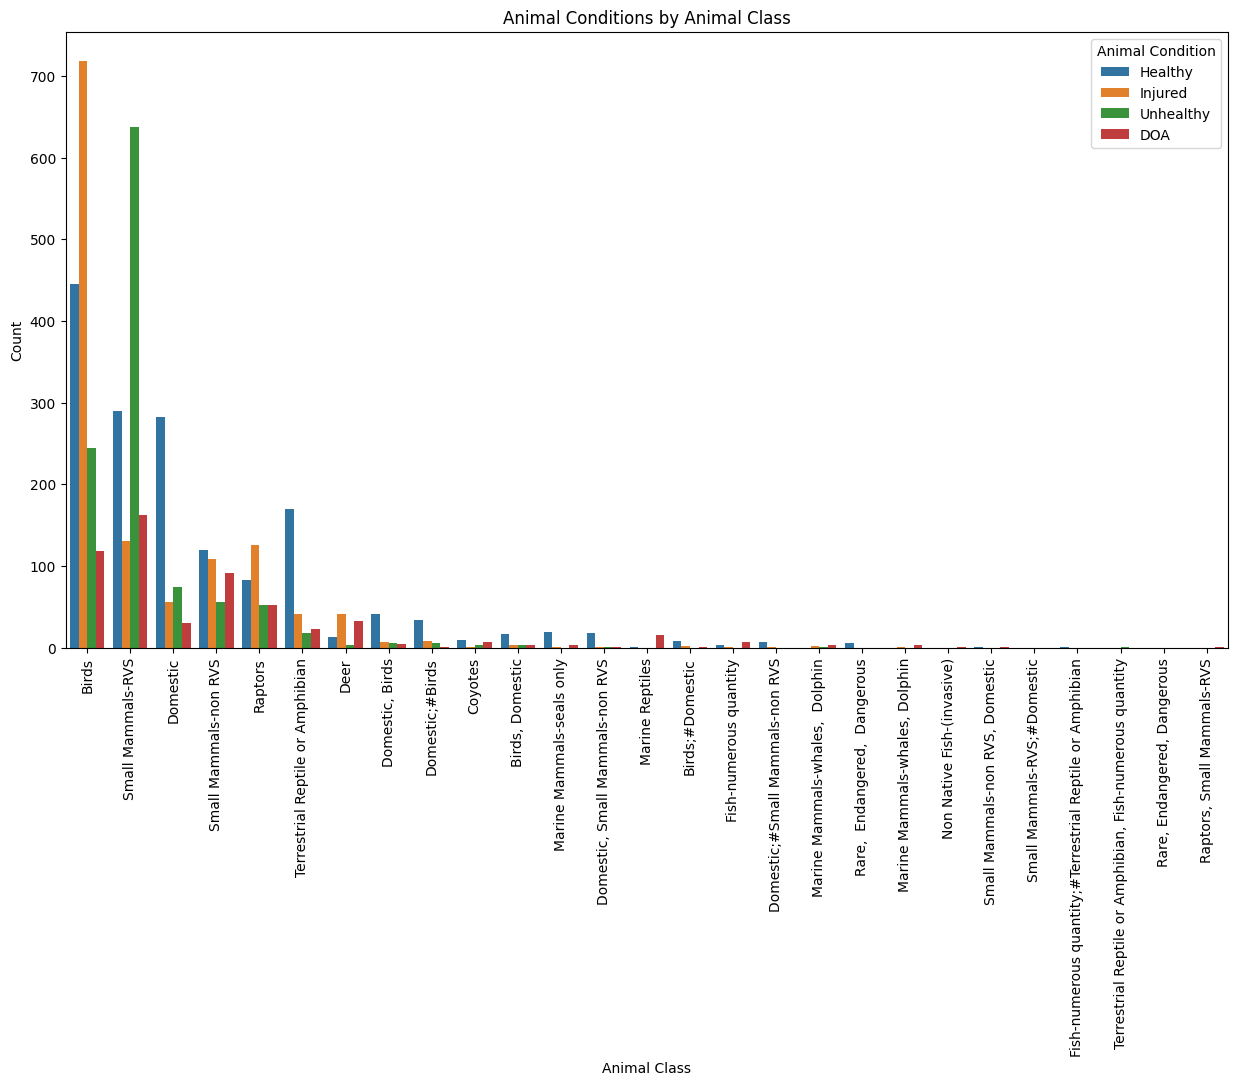

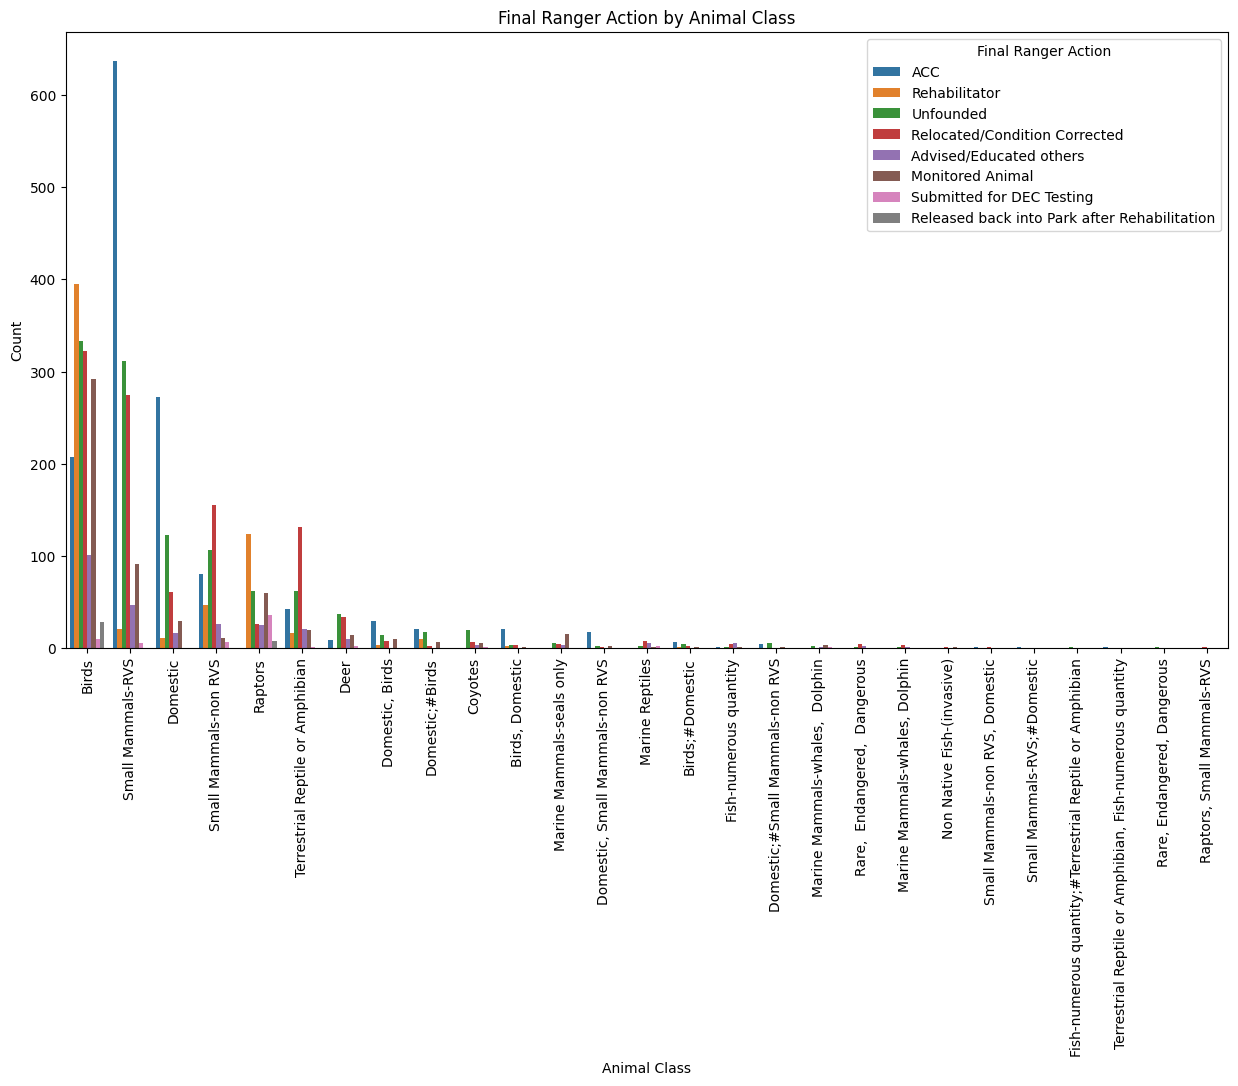

In [ ]:
# convert 'Date and Time of initial call' to datetime
df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])

species_stats = df.groupby(['Species Description', 'Animal Condition', 'Species Status', 'Animal Class'])['# of Animals'].agg(['count', 'sum']).reset_index()
print(species_stats)

# visualization of animal conditions by animal class
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Animal Class', hue='Animal Condition', order=df['Animal Class'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Animal Conditions by Animal Class')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Animal Condition')
plt.show()

# final ranger action by animal class
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Animal Class', hue='Final Ranger Action', order=df['Animal Class'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Final Ranger Action by Animal Class')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Final Ranger Action')
plt.show()